# Transition_graph_of_energy_landscape_builders

Useful functions

In [1]:
from SBL.SBL_pytools import SBL_pytools as sblpyt
help(sblpyt)
 

Help on class SBL_pytools in module SBL.SBL_pytools:

class SBL_pytools(builtins.object)
 |  Static methods defined here:
 |  
 |  convert_eps_to_png(ifname, osize)
 |  
 |  convert_pdf_to_png(ifname, osize)
 |  
 |  find_and_convert(suffix, odir, osize)
 |      # find file with suffix, convert, and return image file
 |  
 |  find_and_show_images(suffix, odir, osize)
 |  
 |  find_file_in_output_directory(suffix, odir)
 |  
 |  show_eps_file(eps_file, osize)
 |  
 |  show_image(img)
 |  
 |  show_log_file(odir)
 |  
 |  show_pdf_file(pdf_file)
 |  
 |  show_row_n_images(images, size)
 |  
 |  show_text_file(file_suffix, odir)
 |  
 |  show_this_text_file(txt_file)
 |  
 |  show_txt_file(file_suffix, odir)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



##  Scenario 1: from a database of stationary points --  illustration on BLN conformations

When a database of connected critical points (local minima and index one saddles) is available, building a transition graph is trivial.

We note that compressed transition graphs (rather than transition graphs) are built, to minimize the memory footprint.

### Options

The options of the <b>runFromDatabase</b> method in the next cell are:
 - <em>metric</em>: euclid or lrmsd
 - <em>discardLoop</em>: remove from the transition graph all transitions incident to only one minimum
 - <em>minimaPoints</em>: plain text file listing all minima conformations as D-dimensional points
 - <em>transitionPoints</em>: plain text file listing all transition conformations as D-dimensional points
 - <em>minimaEnergies</em>: plain text file listing all minima energies
 - <em>transitionEnergies</em>: plain text file listing all transition energies
 - <em>samples2Mins</em>: plain text file listing transitions as pairs of indices of minima
 - <em>weights</em>: optional plain text file listing minima weights for a weighted transition graph
 
 Nb: by  default, no persistence is used. But the executable used can also use persistence.

In [2]:
from SBL.TG_builders import *


sbl_exe_name = "sbl-tg-builder-lrmsd.exe"
odir= "tmp-results-db-lrmsd"
tg1 = TG_builders.build_transition_graph_fromDB(sbl_exe_name,
                                    "data/bln69_database_minima_conformations.txt",  "data/bln69_database_minima_energies.txt",
                                    "data/bln69_database_transitions_conformations.txt",  "data/bln69_database_transitions_energies.txt",
                                    "data/bln69_database_transitions.txt",
                                    odir,
                                    "data/bln69_database_minima_weights.txt")
print(tg1)
sblpyt.list_directory_content(odir)

ModuleNotFoundError: No module named 'SBL_pytools'

## Scenario 2: from a set of samples and associated local minima -- illustration on BLN conformations

Consider now the case where a plain sampling has been obtained, together with the local minimum associated with each sample (obtained by quenching). Let us also assume that the transitions themselves have not been computed. In this case, one can locate pairs of conformations, say $(c_i, c_j)$ satisfying two conditions:

  - the conformations $c_i$ and $c_j$ are neighbor – their distance (for some suitable distance metric) is less than a user defined threshold;

  - the conformations $c_i$ and $c_j$ quench to different local minima.

Such a pairs is said to witness a <em>bifurcation</em>.
Note that the same two local minima may be witnessed by multiple pairs. For small enough value of the distance threshold, the sample with lowest energy amidst such pairs witnesses the adjacency of the catchment basins of $q(c_i)$ and $q(c_j)$.

### Options

The options of the <b>runFromMinima</b> method in the next cell are:
 - <em>metric</em>: euclid or lrmsd
 - <em>conformationPoints</em>: plain text file listing all conformations as D-dimensional points
 - <em>conformationEnergies</em>: plain text file listing all conformation energies
 - <em>quenchedPoints</em>: plain text file listing all quenched conformations as D-dimensional points
 - <em>quenchedEnergies</em>: plain text file listing all quenched conformation energies
 - <em>samples2Mins</em>: plain text file listing pairs of indices (conformations, quenched conformations)
 
 
Nb: by  default, no persistence is used. But the executable used can also use persistence.

In [5]:
from SBL.TG_builders import *

sbl_exe_name = "sbl-tg-builder-lrmsd.exe"
odir= "tmp-results-quench-lrmsd"
tg = TG_builders.build_transition_graph_from_minima(sbl_exe_name,
                                                    "data/bln69_sampling_samples_conformations.txt", "data/bln69_sampling_samples_energies.txt",
                                                    "data/bln69_sampling_quenched_conformations.txt", "data/bln69_sampling_quenched_energies.txt",
                                                    "data/bln69_sampling_samples_to_quench.txt", odir)
print(tg)
sblpyt.list_directory_content(odir)

/user/fcazals/home/projects/proj-soft/sbl-install/bin/sbl-tg-builder-lrmsd.exe
Executing /user/fcazals/home/projects/proj-soft/sbl-install/bin/sbl-tg-builder-lrmsd.exe --from-sampling                   --points-file data/bln69_sampling_samples_conformations.txt --energies data/bln69_sampling_samples_energies.txt --points-file data/bln69_sampling_quenched_conformations.txt --energies data/bln69_sampling_quenched_energies.txt --samples-to-mins data/bln69_sampling_samples_to_quench.txt                   --directory tmp-results-quench-lrmsd --verbose --log --num-neighbors 8

tmp-results-quench-lrmsd/sbl-tg-builder-lrmsd__wtg.xml
Files in directory tmp-results-quench-lrmsd: ['sbl-tg-builder-lrmsd__disconnectivity_forest.eps\n', 'sbl-tg-builder-lrmsd__log.txt\n', 'sbl-tg-builder-lrmsd__MSW_chain_complex.xml\n', 'sbl-tg-builder-lrmsd__nng.xml\n', 'sbl-tg-builder-lrmsd__persistence_diagram.pdf\n', 'sbl-tg-builder-lrmsd__persistence_diagram.plot\n', 'sbl-tg-builder-lrmsd__persistence_diagram.tx

## Let us visualize the  disconnectivity tree and the persistence diagram 

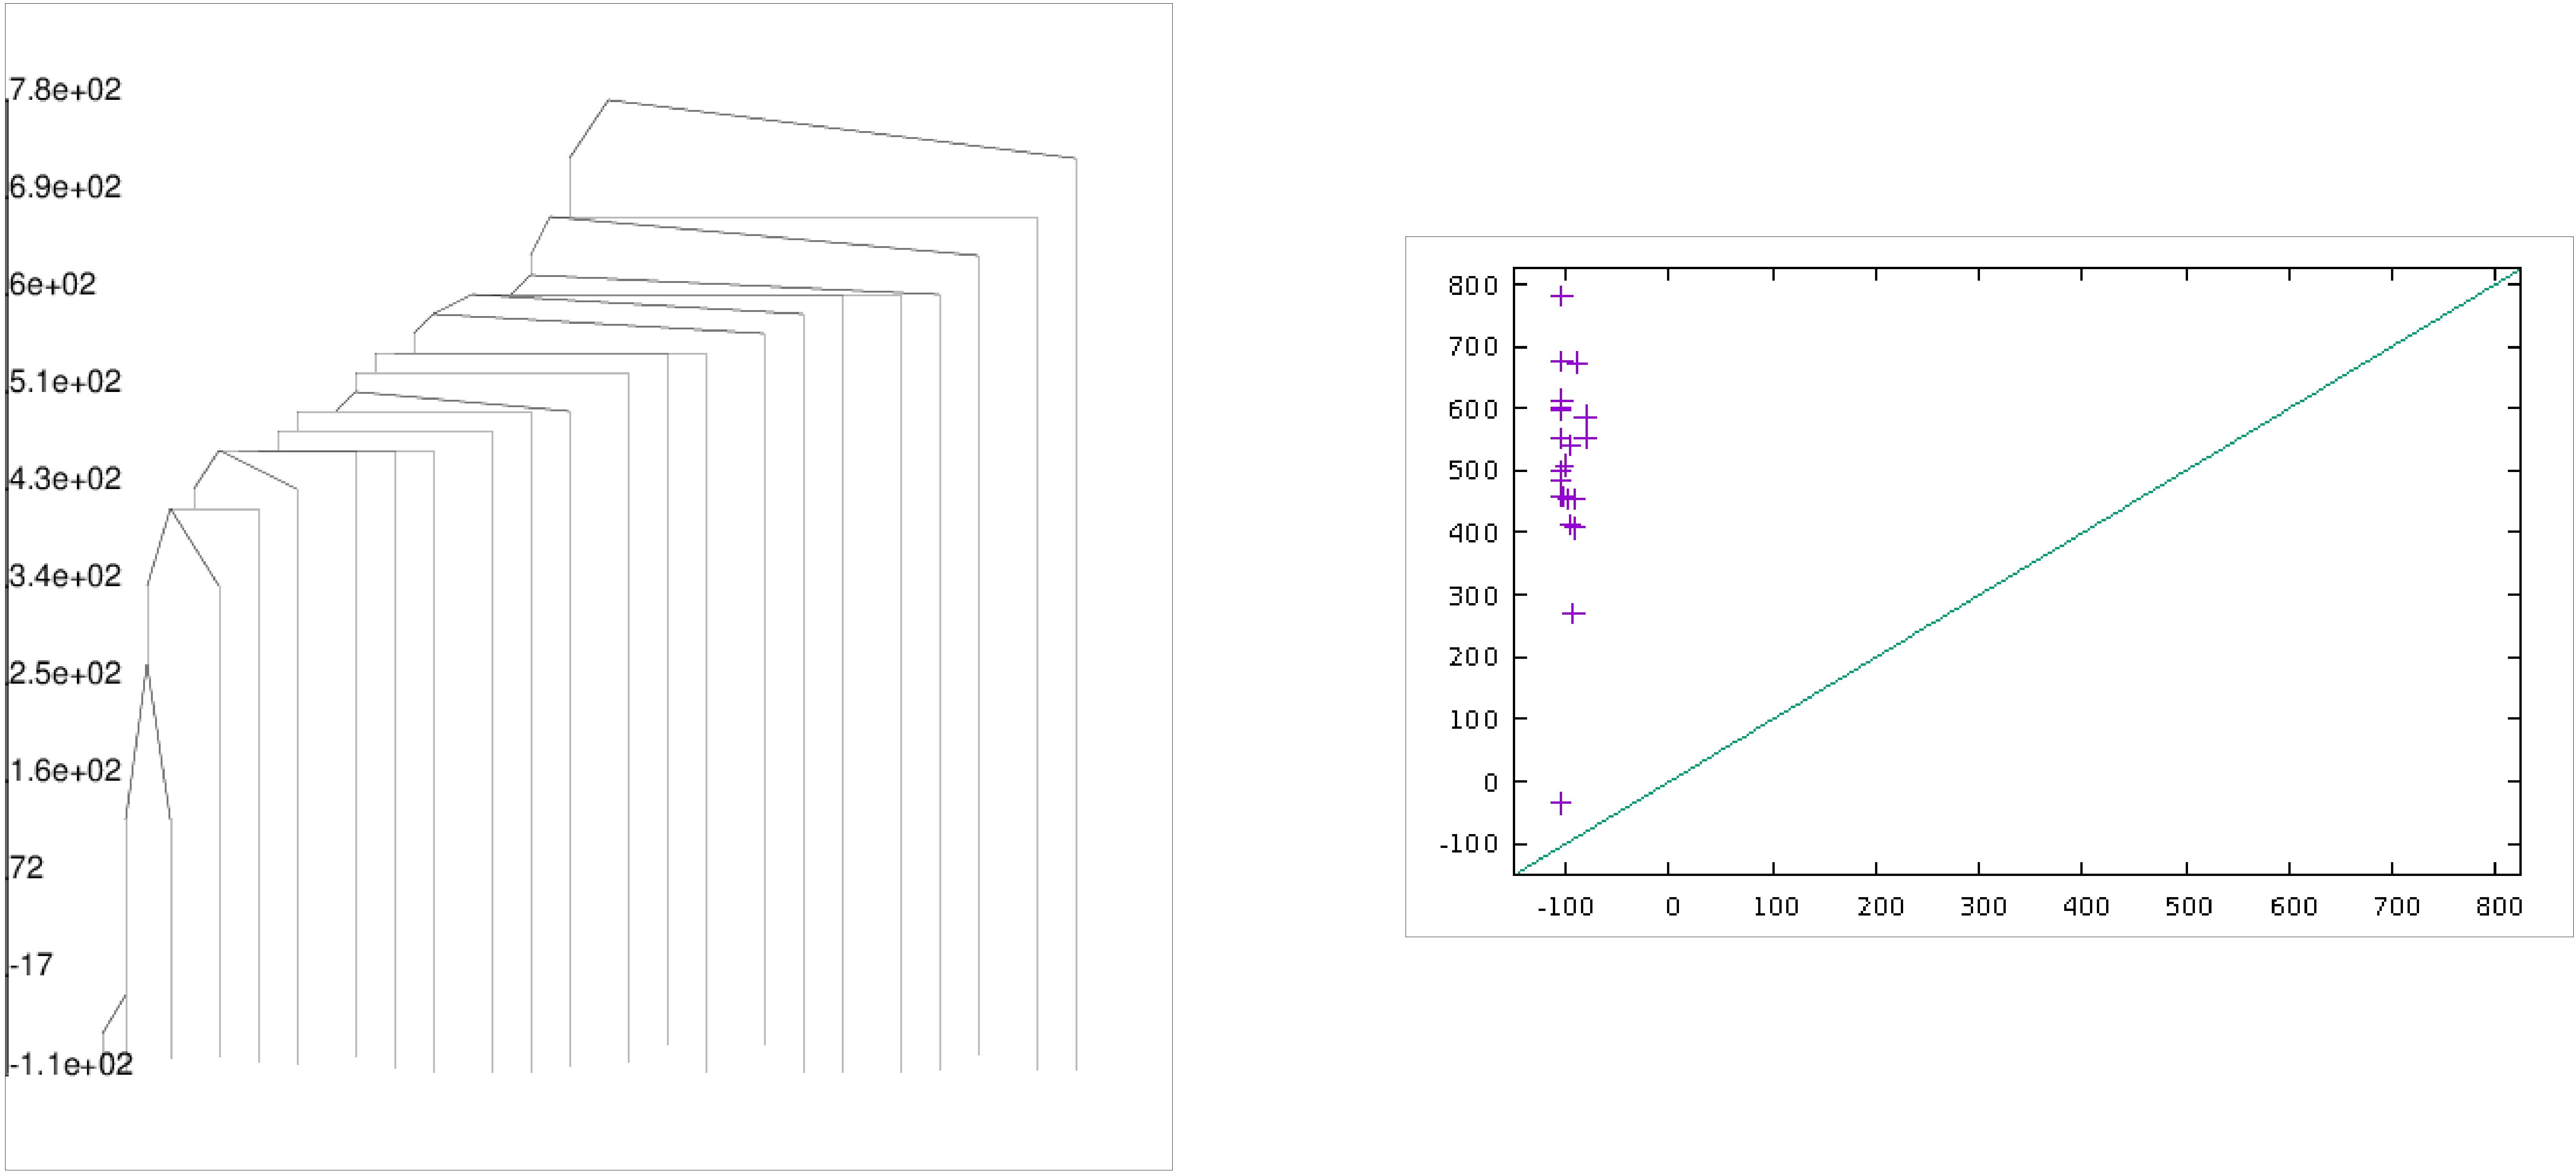

Figs displayed


In [6]:
odir = "tmp-results-quench-lrmsd"
images = []
images.append( sblpyt.find_and_convert("disconnectivity_forest.eps", odir, 100) )
images.append( sblpyt.find_and_convert("persistence_diagram.pdf", odir,100) )
sblpyt.show_row_n_images(images, 100)


## Scenario 3 : from a set of samples -- illustration on the 2D terrain Himmelblau

Consider finally the cases where only samples are known – that is the local minimum $q(c_i)$ associated with a conformation $c_i$ is unknown. Also assume that the neighborhood of $c_i$ has been densely sampled, and that $c_i$ has been connected to a set of nearest neighbors, using a nearest neighbor graph (NNG). We estimate the gradient of the potential energy at $c_i$ using its neighbors in the NNG. More precisely, we estimate the gradient using the neighbor $c_k$ of $c_i$ yielding the maximum slope. Starting from $c_i$ and iteratively following this estimated gradient eventually leads to a sample having all its neighbors above it. One can use this sample as a substitute $\tilde{q}(c_i)$ for $q(c_i)$.


### Options

The options of the <b>runFromSamples</b> method in the next cell are:
 - <em>metric</em>: euclid or lrmsd
 - <em>conformationPoints</em>: plain text file listing all conformations as D-dimensional points
 - <em>conformationEnergies</em>: plain text file listing all conformation energies
 - <em>persistence</em>: ersistence threshold for removing not-persistent basins due to noisy data
 
 Nb: by  default, no persistence is used. But the executable used can also use persistence.

In [7]:
from SBL.TG_builders import *

sbl_exe_name = "sbl-tg-builder-euclid.exe"
odir = "tmp-results-sampling"

tg = TG_builders.build_transition_graph_from_sampling(sbl_exe_name, "data/himmelblau_rand_points.txt", "data/himmelblau_rand_heights.txt", odir)
print(tg)
sblpyt.list_directory_content(odir)

/user/fcazals/home/projects/proj-soft/sbl-install/bin/sbl-tg-builder-euclid.exe
Executing /user/fcazals/home/projects/proj-soft/sbl-install/bin/sbl-tg-builder-euclid.exe --from-sampling         --points-file data/himmelblau_rand_points.txt --energies data/himmelblau_rand_heights.txt --persistence-threshold -1.000000               --directory tmp-results-sampling --verbose --log --num-neighbors 8

tmp-results-sampling/sbl-tg-builder-euclid__wtg.xml
Files in directory tmp-results-sampling: ['sbl-tg-builder-euclid__disconnectivity_forest.eps\n', 'sbl-tg-builder-euclid__log.txt\n', 'sbl-tg-builder-euclid__MSW_chain_complex.xml\n', 'sbl-tg-builder-euclid__nng.xml\n', 'sbl-tg-builder-euclid__persistence_diagram.pdf\n', 'sbl-tg-builder-euclid__persistence_diagram.plot\n', 'sbl-tg-builder-euclid__persistence_diagram.txt\n', 'sbl-tg-builder-euclid__persistence_histogram.pdf\n', 'sbl-tg-builder-euclid__persistence_histogram.r\n', 'sbl-tg-builder-euclid__persistence_histogram.txt\n', 'sbl-tg-buil

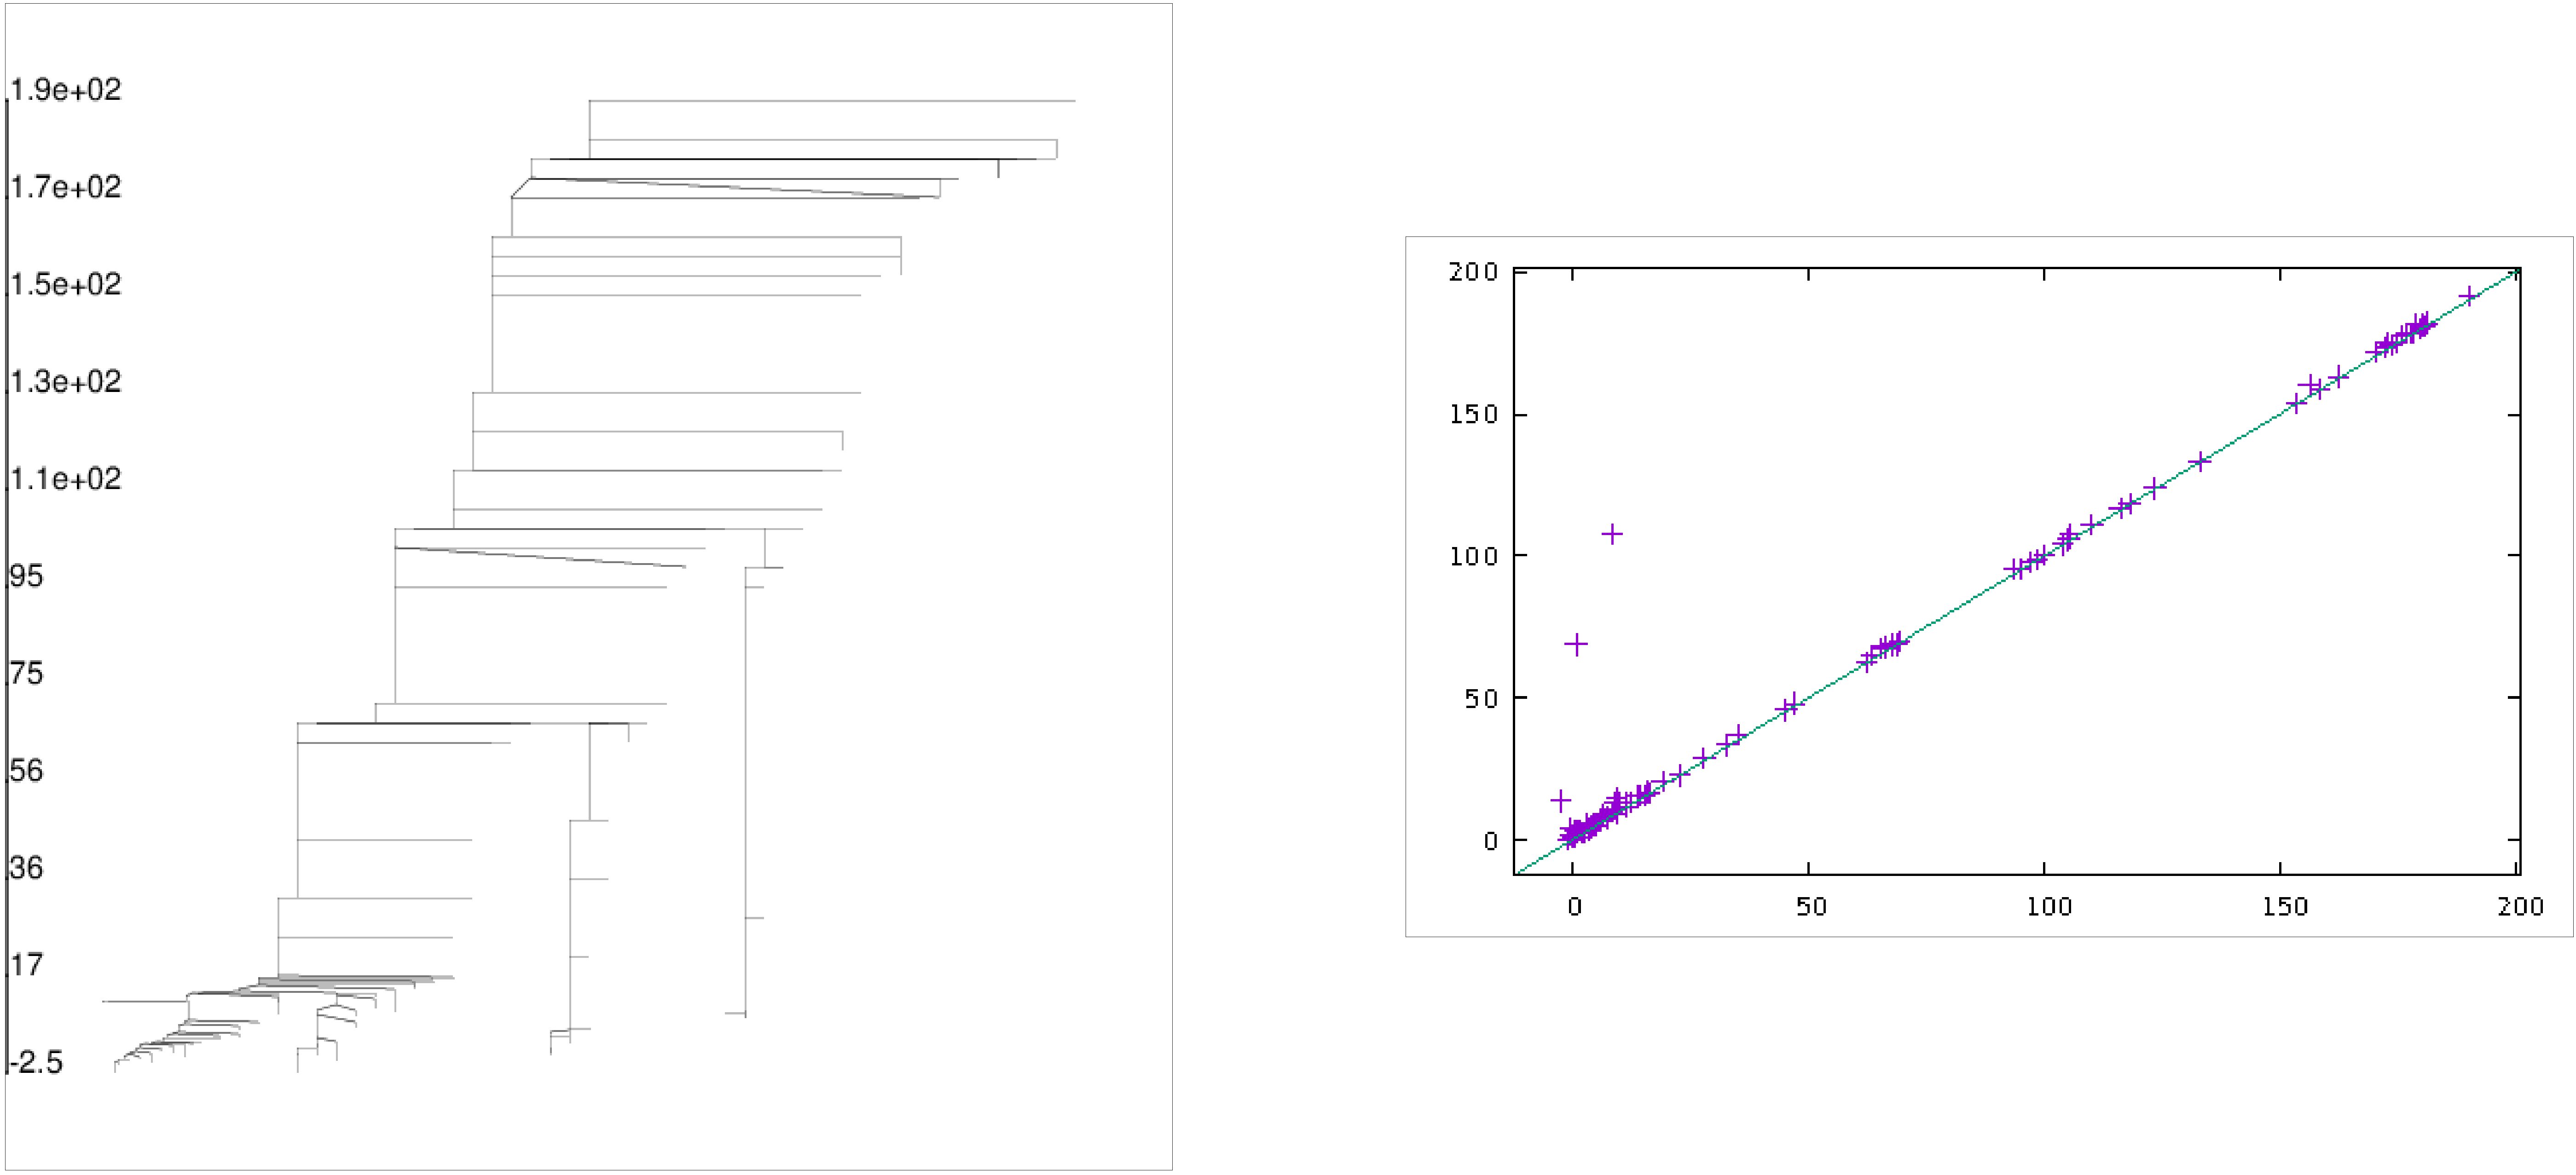

Figs displayed


In [8]:
odir = "tmp-results-sampling"
images = []
images.append( sblpyt.find_and_convert("disconnectivity_forest.eps", odir, 100) )
images.append( sblpyt.find_and_convert("persistence_diagram.pdf", odir,100) )
sblpyt.show_row_n_images(images, 100)